In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os

# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Definir el modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.build()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nAccuracy on test set: {test_acc * 100:.2f}%')


Epoch 1/5
750/750 [==============================] - 36s 44ms/step - loss: 0.2030 - accuracy: 0.9384 - val_loss: 0.0665 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 32s 42ms/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.0668 - val_accuracy: 0.9804
Epoch 3/5
750/750 [==============================] - 30s 40ms/step - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 4/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0286 - accuracy: 0.9907

Accuracy on test set: 99.07%


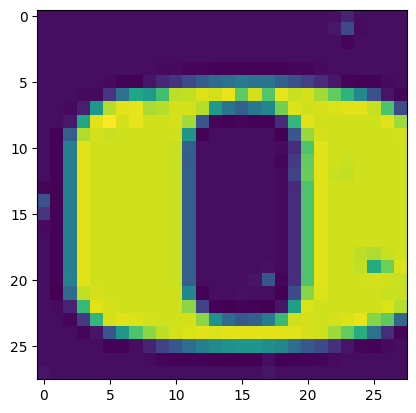

1/1 [==============================] - 0s 56ms/step
[[9.3212670e-01 4.5762063e-04 3.4134786e-03 6.7193971e-05 1.1734828e-04
  4.6319044e-03 1.7391522e-03 1.0967672e-02 4.4255074e-02 2.2238952e-03]]
1/1 [==============================] - 0s 56ms/step
0


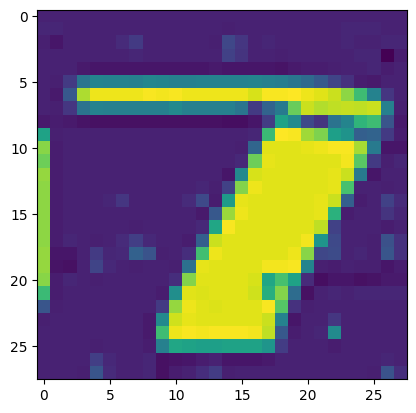

1/1 [==============================] - 0s 48ms/step
[[0.01666231 0.03683952 0.07571843 0.0802215  0.0008225  0.00886861
  0.00125669 0.7283097  0.03820726 0.01309349]]
1/1 [==============================] - 0s 40ms/step
7


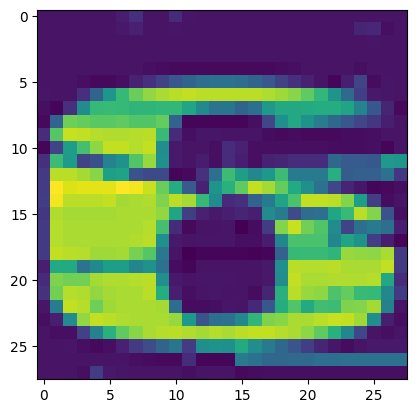

1/1 [==============================] - 0s 32ms/step
[[0.15687566 0.00613319 0.02405087 0.00937432 0.00496108 0.3552118
  0.20164765 0.01916352 0.18364285 0.03893905]]
1/1 [==============================] - 0s 32ms/step
5


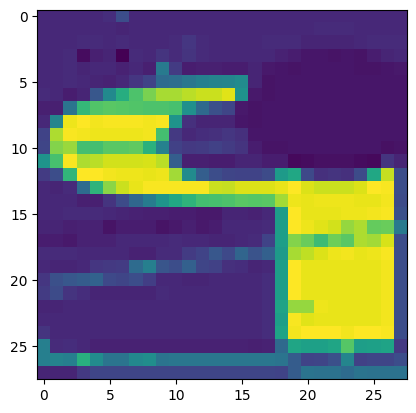

1/1 [==============================] - 0s 48ms/step
[[0.00166874 0.00870912 0.00960628 0.00313356 0.15815899 0.5576951
  0.01227742 0.1638082  0.0583965  0.02654604]]
1/1 [==============================] - 0s 32ms/step
5


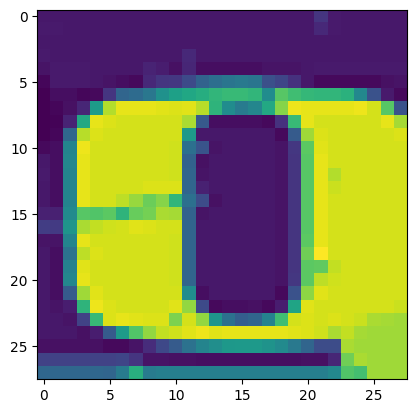

1/1 [==============================] - 0s 36ms/step
[[9.2863899e-01 7.0830790e-04 4.4129090e-03 1.0057743e-04 2.4776295e-04
  5.6008687e-03 2.5795416e-03 1.2932139e-02 4.1390046e-02 3.3887941e-03]]
1/1 [==============================] - 0s 48ms/step
0


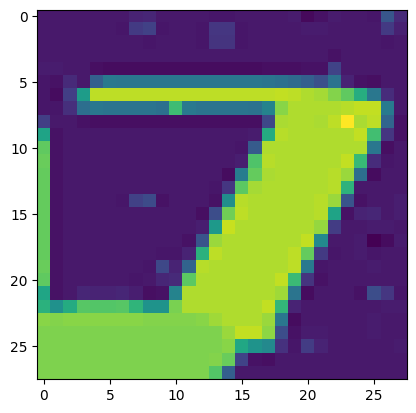

1/1 [==============================] - 0s 40ms/step
[[1.33963665e-02 3.28430906e-02 3.53022143e-02 1.98974431e-01
  5.06823708e-04 8.40453804e-03 6.21802988e-04 6.72268152e-01
  2.66640652e-02 1.10184951e-02]]
1/1 [==============================] - 0s 32ms/step
7


In [49]:
import numpy as np
import matplotlib.pyplot as plt


def cachitos_de_sushi(path): #
    img = Image.open(path)
    img = np.array(img)

    for trozo in range(6):
        trozo_de_imagen = img[:,trozo*33:(trozo+1)*33]
        auxiliar = Image.fromarray(trozo_de_imagen).resize((28,28)).convert('L')
        trozo_de_imagen = np.array(auxiliar)
        trozo_de_imagen = np.reshape(trozo_de_imagen, (28,28))
        # mg = np.array(img).reshape((1,28,28,1)).astype('float32') / 255
        plt.imshow(trozo_de_imagen)
        plt.show()
        print(model.predict(trozo_de_imagen.reshape((1,28,28,1)).astype("float32")/255))
        print(np.argmax(model.predict(trozo_de_imagen.reshape((1,28,28,1)).astype("float32")/255)))

cachitos_de_sushi("./train/00002.png")

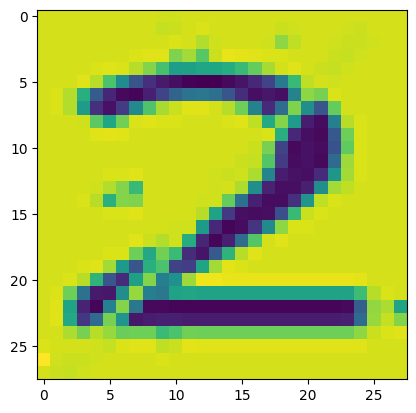

(1, 28, 28, 1)
1/1 [==============================] - 0s 40ms/step
2


In [45]:

test_img = Image.open(os.path.join("./","2.png")).convert('L')
img = test_img.resize((28,28))
img = np.array(img).reshape((1,28,28,1)).astype('float32') / 255

imgplot = plt.imshow(img.reshape((28,28,1)))
plt.show()
print(img.shape)
 
test = np.array(model.predict(img))
print(np.argmax(test))